<a href="https://colab.research.google.com/github/adityasingh1993/ML-DL-AI-LearnAndTry/blob/main/LLM/FinanceClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!ls

In [ ]:
!unzip Financial-QA-10k.csv.zip

In [1]:
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
import spacy
from spacy.lang.en import stop_words


# nltk.download('all')

In [2]:
all_stop_word=stop_words.STOP_WORDS

In [3]:
"be" not in all_stop_word

False

In [4]:

nlp = spacy.load("en_core_web_sm")


In [5]:
txt=nlp("hi this is Aditya")

In [6]:
for ent in txt:
  if ent.text not in list(all_stop_word):
    print(ent, ent.lemma_)


hi hi
Aditya Aditya


### Load dataframe

In [83]:
df=pd.read_csv("Financial-QA-10k.csv")

In [84]:
df.head(2)

,question,answer,context,ticker,filing
0,What area did NVIDIA initially focus on before...,NVIDIA initially focused on PC graphics.,"Since our original focus on PC graphics, we ha...",NVDA,2023_10K
1,What are some of the recent applications of GP...,Recent applications of GPU-powered deep learni...,Some of the most recent applications of GPU-po...,NVDA,2023_10K


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   question  6998 non-null   object
 1   answer    6998 non-null   object
 2   context   6999 non-null   object
 3   ticker    7000 non-null   object
 4   filing    7000 non-null   object
dtypes: object(5)
memory usage: 273.6+ KB



## Lets do some exploartaion

### check the length of each columns

<Axes: ylabel='Frequency'>

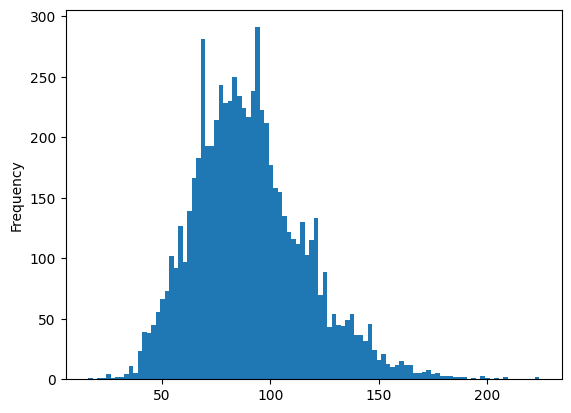

In [86]:
df["question"].str.len().plot(kind='hist',bins=100)

Text(0.5, 0, 'length->')

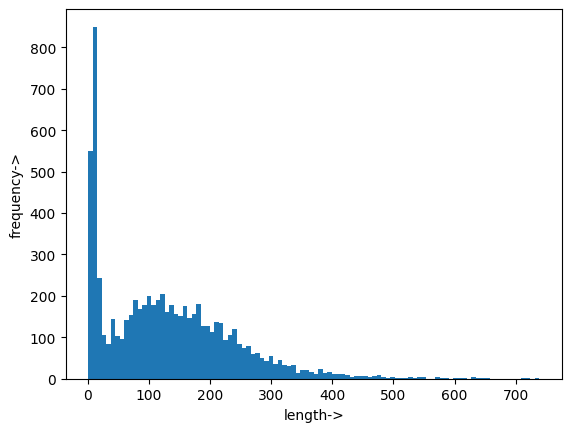

In [87]:
df["answer"].str.len().plot(kind='hist',bins=100)
plt.ylabel("frequency->")
plt.xlabel("length->")

In [89]:
df=df[df["context"].str.len()>10]

(0.0, 1000.0)

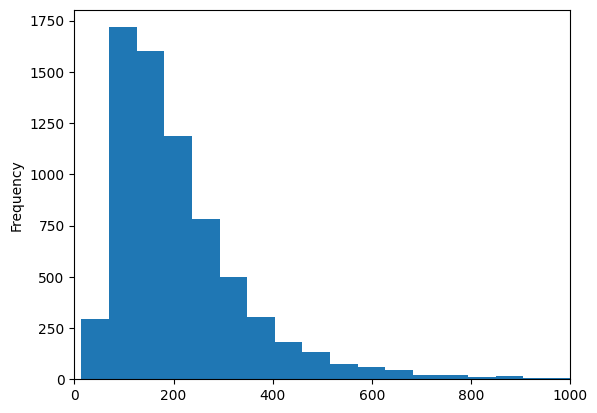

In [90]:
df["context"].str.len().plot(kind='hist',bins=100)
plt.xlim((0,1000))

<Axes: ylabel='Frequency'>

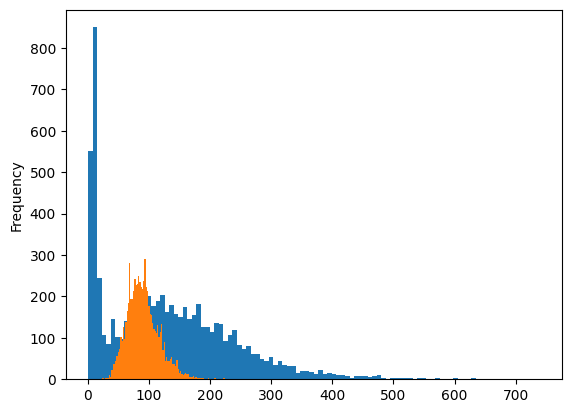

In [91]:
df["answer"].str.len().plot(kind='hist',bins=100)
df["question"].str.len().plot(kind='hist',bins=100)

In [92]:
df.columns

Index(['question', 'answer', 'context', 'ticker', 'filing'], dtype='object')

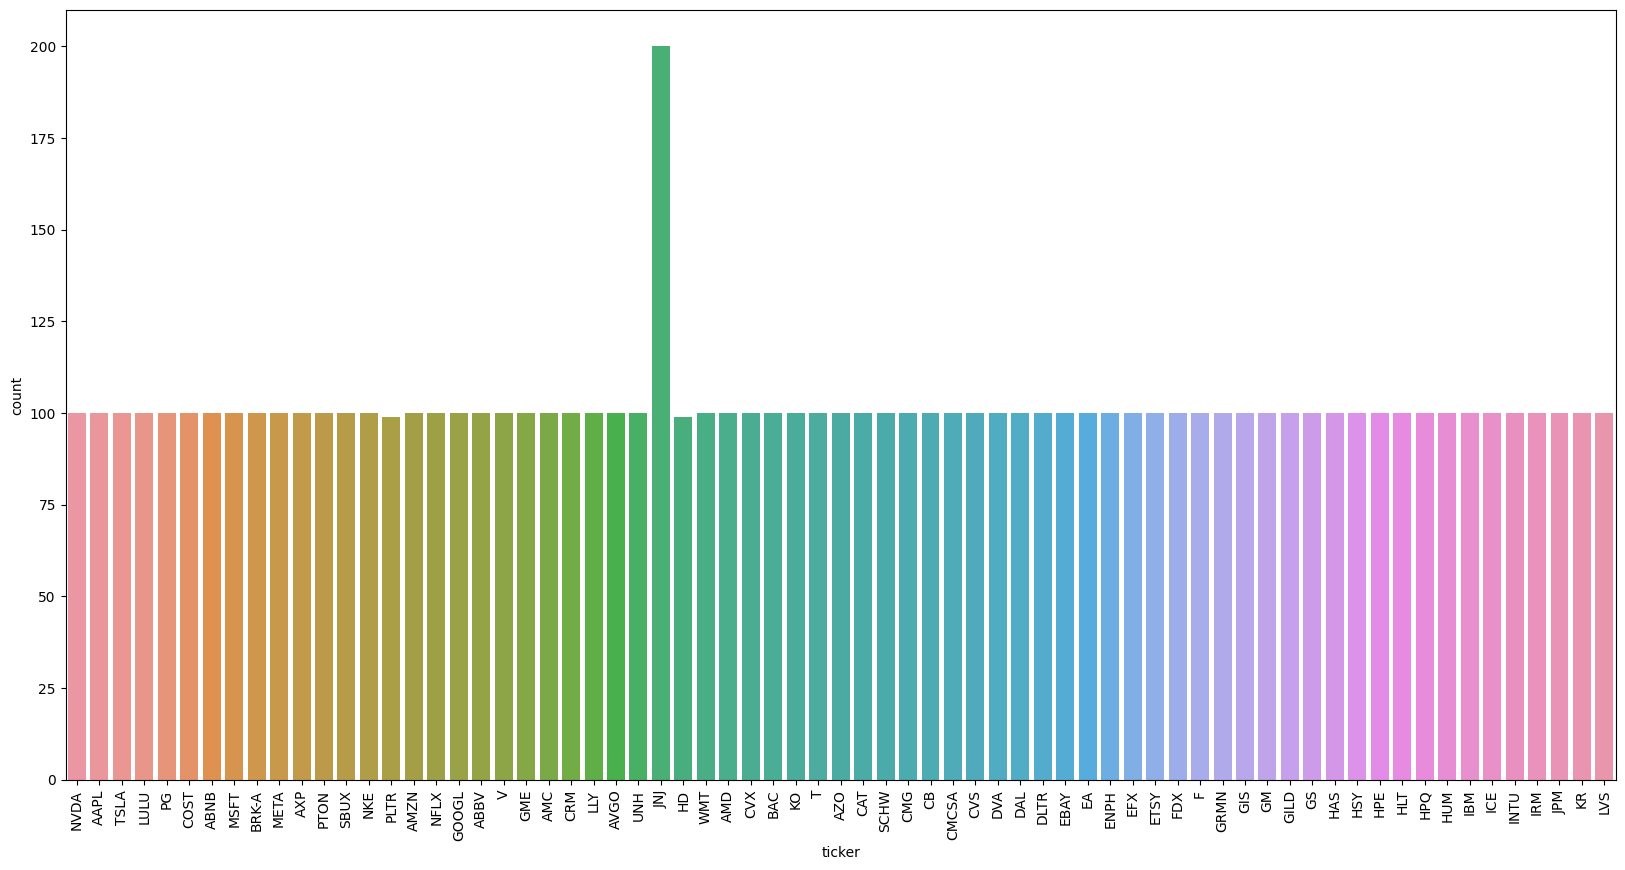

In [93]:
plt.figure(figsize=(20,10))
sns.countplot(data=df,x='ticker')
plt.xticks(rotation=90)
plt.show()

<Axes: ylabel='count'>

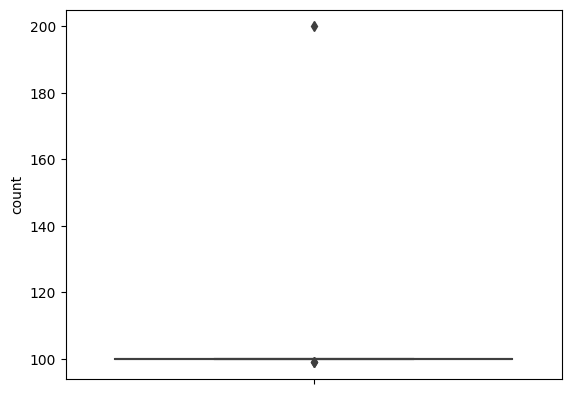

In [94]:
sns.boxplot(y=df["ticker"].value_counts().reset_index()["count"])

In [95]:
df["question"].iloc[0].translate(str.maketrans('','',string.punctuation))

'What area did NVIDIA initially focus on before expanding to other computationally intensive fields'

In [96]:
# stopwords('english').words

In [97]:

def remove_punctuation(text):
  try:
    text=text.translate(str.maketrans('','',string.punctuation)).lower()
    txt=nlp(text)
    res=[]
    for ent in txt:
      if ent.text not in list(all_stop_word):
          res.append(ent.lemma_)
    return " ".join(res)
  except:
    print(f"text: {text}")
    return ''


In [98]:
df["clean_context"]=df["context"].apply(lambda x:remove_punctuation(x))
df["clean_answer"]=df["answer"].apply(lambda x:remove_punctuation(x))

text: nan


In [99]:
df=df[df["context"].str.len()>10]

In [100]:
def check_common_words(answer,context):
  try:
    return (len(set(answer.split(' ')).intersection(set(context.split(' '))))/len(answer.split(' ')))*100
  except Exception as ex:
    print(f"exeption: {ex}")
    return 100

In [101]:
df["answer_context_commonword"]=df.apply(lambda x: check_common_words(x.clean_answer,x.clean_context),axis=1)

<Axes: ylabel='Frequency'>

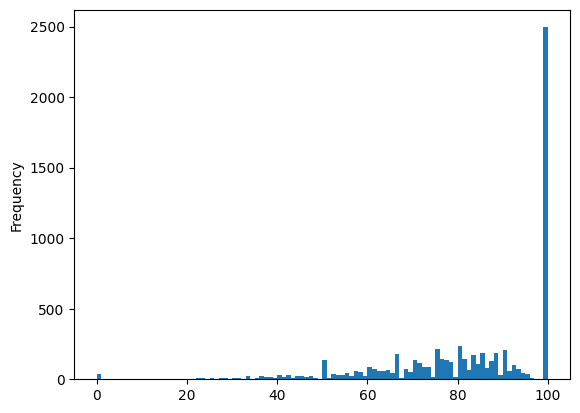

In [102]:
df["answer_context_commonword"].plot(kind='hist',bins=100)

In [27]:
df=df[df["answer_context_commonword"]>=50]

In [103]:
df[["answer_context_commonword"]].describe()

,answer_context_commonword
count,6998.000000
mean,82.145676
std,19.151391
min,0.000000
25%,71.428571
50%,85.714286
75%,100.000000
max,100.000000


In [104]:
from scipy.stats import ttest_ind

In [105]:
unique_ticker=list(df["ticker"].unique())

In [106]:
for tck in unique_ticker:
  print(ttest_ind(df[df['ticker']==tck]['answer_context_commonword'],df[df['ticker']!=tck]['answer_context_commonword']))

TtestResult(statistic=-1.4166499141595867, pvalue=0.15662983245843382, df=6996.0)
TtestResult(statistic=4.03585923730203, pvalue=5.4982836205169435e-05, df=6996.0)
TtestResult(statistic=-1.1962102772300247, pvalue=0.2316550501496936, df=6996.0)
TtestResult(statistic=-8.010228024975182, pvalue=1.331263265684351e-15, df=6996.0)
TtestResult(statistic=-2.983003247519079, pvalue=0.0028641987613213086, df=6996.0)
TtestResult(statistic=-2.9555522122989855, pvalue=0.003131511039340195, df=6996.0)
TtestResult(statistic=-2.1982812231045243, pvalue=0.027961706237108253, df=6996.0)
TtestResult(statistic=-3.6294783307277436, pvalue=0.00028602155750641, df=6996.0)
TtestResult(statistic=-1.5864750803789833, pvalue=0.11267677420692902, df=6996.0)
TtestResult(statistic=-2.0863323290983655, pvalue=0.036984657996193084, df=6996.0)
TtestResult(statistic=-5.5540646438212296, pvalue=2.8935495903587954e-08, df=6996.0)
TtestResult(statistic=-4.8720455379918635, pvalue=1.128779321325134e-06, df=6996.0)
TtestRe

### From the above figure, we can assume, most of the answers word has been captured in the context. Mean is 88%

### Further we can try checking the n-gram method, jsut like Rouge to check if answer lies in context or not

## Now further we can do one more step of preprocessing of remove stopwords and contractions

## Further we can go for modelling. For modelling we can take any of the following 3 ways
<li> TFIDVectorizer and mlalgorithm like xgboost or Randomforest </li>
<li> WordEmbeddings and LSTM </li>
<li> Bert based Classification Model </li>


## **TFIDFVectorizer and Machine learning**





In [107]:
from sklearn.feature_extraction.text import TfidfVectorizer
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB,CategoricalNB

In [108]:
X_train, X_test, Y_train, Y_test= train_test_split(df["clean_context"]+df["clean_answer"],df["ticker"])

In [109]:
oh=OneHotEncoder(sparse_output=False)

Y_train1=oh.fit_transform(Y_train.iloc[:].values.reshape(-1,1))


In [110]:
lc=LabelEncoder()
Y_train2=lc.fit_transform(Y_train.iloc[:].values.reshape(-1,1))

/home/sig9moid/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [111]:
Y_train1.shape

(5248, 69)

In [49]:
tfidf=TfidfVectorizer()


In [50]:
X_train_tfid=tfidf.fit_transform(X_train)

AttributeError: 'numpy.ndarray' object has no attribute 'lower'

In [ ]:
model1=xgb.XGBClassifier(n_estimator=200,n_estimators=200,max_depth=100,)
model2=xgb.XGBClassifier(n_estimator=200,n_estimators=200,max_depth=100,)

In [ ]:
model3=GaussianNB()
model4=CategoricalNB()

In [ ]:
model3.fit(X_train_tfid.toarray(),Y_train2)

In [ ]:
model1.fit(X_train_tfid,Y_train1)

In [ ]:
model2.fit(X_train_tfid,Y_train2)

In [ ]:
y_pred1=model1.predict(tfidf.transform(X_test))
y_pred2=model2.predict(tfidf.transform(X_test))

In [ ]:
accuracy_score(oh.transform(Y_test.iloc[:].values.reshape(-1,1)), y_pred1)

In [ ]:
accuracy_score(lc.transform(Y_test), y_pred2)

In [ ]:
# accuracy_score(lc.transform(Y_test), y_pred3)

# LSTM Based Model


In [ ]:
df.columns

In [112]:
df["combined_context_answer"]=df["clean_context"]+" "+df["clean_answer"]

In [113]:
def wordandidx(alltexts):
  wordidx={}
  idxword={}
  idx=1
  for text in alltexts:
    words=text.split(" ")
    for word in words:
      if word not in wordidx:
        wordidx[word]=idx
        idx=idx+1
  idxword={v:i for i,v in wordidx.items()}
  return wordidx,idxword

In [114]:
word2idx,idx2word=wordandidx(list(df["combined_context_answer"]))

In [115]:
word2idx['25x']

11255

In [116]:
def texttolist(alltext,word2idx):
  listres=[]
  for text in alltext:
    tempres=[]
    words=text.split(" ")
    for word in words:
      tempres.append(word2idx[word])
    listres.append(tempres)
  return listres

In [117]:
text_to_index=texttolist(list(df["combined_context_answer"]),word2idx)

In [118]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences



In [120]:
Y=oh.fit_transform(df["ticker"].iloc[:].values.reshape(-1,1))

In [121]:
st=StandardScaler()
X=padded_text_seq#st.fit_transform(np.array(padded_text_seq))

In [148]:
from tensorflow.keras import Input
from tensorflow.keras.layers import LSTM, Embedding, Dense, ReLU, Bidirectional,BatchNormalization, LayerNormalization
from tensorflow.keras import Model
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.regularizers import L1L2
from tensorflow.keras.preprocessing.text import Tokenizer

In [130]:
vocab_size=len(word2idx)

In [173]:
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(df['combined_context_answer'])
text_to_index=tokenizer.texts_to_sequences(list(df["combined_context_answer"]))

In [188]:
padded_text_seq=pad_sequences(text_to_index, maxlen=50, padding='post',truncating='post')

In [189]:
padded_text_seq[0]

array([1551,  162,  916, 1448,  420,  290, 1169,    1,    1, 1378,  729,
       1337,  162,  916, 1448,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0], dtype=int32)

In [190]:
X_train,X_test, Y_train, Y_test=train_test_split(X,Y)

In [201]:
input =Input(shape=(None,), name="Input")
emdeddinglayer=Embedding(len(word2idx),128)(input)
lstm=LSTM(units=64,return_sequences=False)(emdeddinglayer)
# lstm2=Bidirectional(LSTM(units=64))(lstm)

norm=LayerNormalization()(lstm)
dense1=Dense(128, activation='relu')(norm)
# # norm2=BatchNormalization()(dense1)
# dense2=Dense(100, activation='relu')(dense1)
dense3=Dense(69,activation='softmax')(dense1)

In [202]:
model=Model(inputs=input,outputs=dense3)

In [203]:
model.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, None)]            0         
                                                                 
 embedding_13 (Embedding)    (None, None, 128)         1440640   
                                                                 
 lstm_12 (LSTM)              (None, 64)                49408     
                                                                 
 layer_normalization_3 (Lay  (None, 64)                128       
 erNormalization)                                                
                                                                 
 dense_17 (Dense)            (None, 128)               8320      
                                                                 
 dense_18 (Dense)            (None, 69)                8901      
                                                          

In [204]:
model.compile(optimizer=AdamW(learning_rate=0.0001),loss='categorical_focal_crossentropy',metrics=['acc'])

In [205]:
history=model.fit(X_train,Y_train,epochs=20, batch_size=16, validation_data=[X_test,Y_test])

Epoch 1/20
328/328 [==============================] - 18s 48ms/step - loss: 1.0315 - acc: 0.0309 - val_loss: 1.0307 - val_acc: 0.0223
Epoch 2/20
328/328 [==============================] - 5s 16ms/step - loss: 1.0274 - acc: 0.0337 - val_loss: 1.0295 - val_acc: 0.0223
Epoch 3/20
328/328 [==============================] - 5s 15ms/step - loss: 1.0257 - acc: 0.0375 - val_loss: 1.0307 - val_acc: 0.0223
Epoch 4/20
328/328 [==============================] - 4s 11ms/step - loss: 1.0239 - acc: 0.0410 - val_loss: 1.0305 - val_acc: 0.0223
Epoch 5/20
328/328 [==============================] - 4s 11ms/step - loss: 1.0214 - acc: 0.0423 - val_loss: 1.0306 - val_acc: 0.0223
Epoch 6/20
328/328 [==============================] - 4s 11ms/step - loss: 1.0194 - acc: 0.0415 - val_loss: 1.0299 - val_acc: 0.0229
Epoch 7/20
328/328 [==============================] - 3s 10ms/step - loss: 1.0176 - acc: 0.0429 - val_loss: 1.0307 - val_acc: 0.0229
Epoch 8/20
328/328 [==============================] - 3s 10ms/step -

In [197]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [198]:
X_train.shape

(5248, 100)

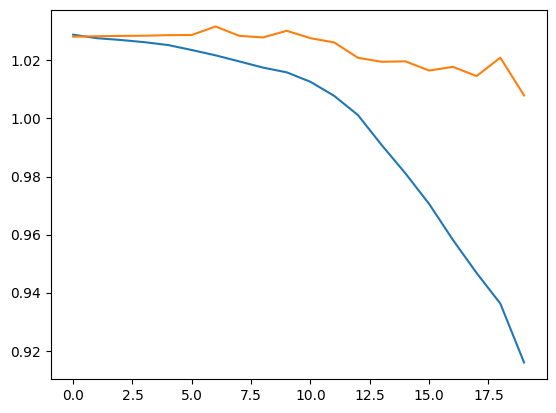

In [199]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

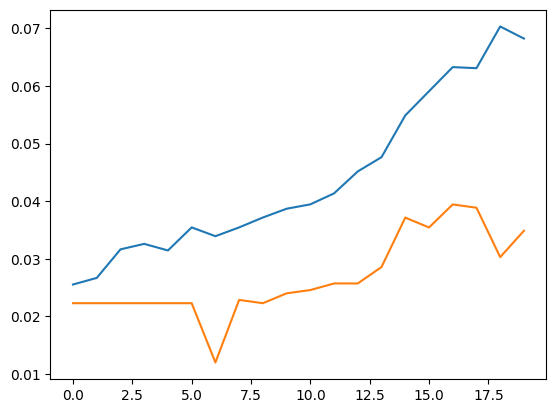

In [200]:
plt.plot(history.history["acc"])
plt.plot(history.history["val_acc"])